<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#importing the libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading data
housing_data = pd.read_csv('/content/Housing.csv')
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#checking missing values
housing_data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## Data Prepocessing

In [6]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
# Checking unique values for different columns
print("Unique values for mainroad:", housing_data['mainroad'].unique())
print("Unique values for guestroom:", housing_data['guestroom'].unique())
print("Unique values for basement:", housing_data['basement'].unique())
print("Unique values for hotwaterheating:", housing_data['hotwaterheating'].unique())
print("Unique values for airconditioning:", housing_data['airconditioning'].unique())
print("Unique values for prefarea:", housing_data['prefarea'].unique())
print("Unique values for furnishingstatus:", housing_data['furnishingstatus'].unique())



Unique values for mainroad: ['yes' 'no']
Unique values for guestroom: ['no' 'yes']
Unique values for basement: ['no' 'yes']
Unique values for hotwaterheating: ['no' 'yes']
Unique values for airconditioning: ['yes' 'no']
Unique values for prefarea: ['yes' 'no']
Unique values for furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


### Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding for binary variables
housing_data['mainroad'] = label_encoder.fit_transform(housing_data['mainroad'])
housing_data['guestroom'] = label_encoder.fit_transform(housing_data['guestroom'])
housing_data['basement'] = label_encoder.fit_transform(housing_data['basement'])
housing_data['hotwaterheating'] = label_encoder.fit_transform(housing_data['hotwaterheating'])
housing_data['airconditioning'] = label_encoder.fit_transform(housing_data['airconditioning'])
housing_data['prefarea'] = label_encoder.fit_transform(housing_data['prefarea'])

# Apply Label Encoding for the 'furnishingstatus' column (3 categories)
housing_data['furnishingstatus'] = label_encoder.fit_transform(housing_data['furnishingstatus'])

# View the transformed data
print(housing_data.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


### Data Analysis

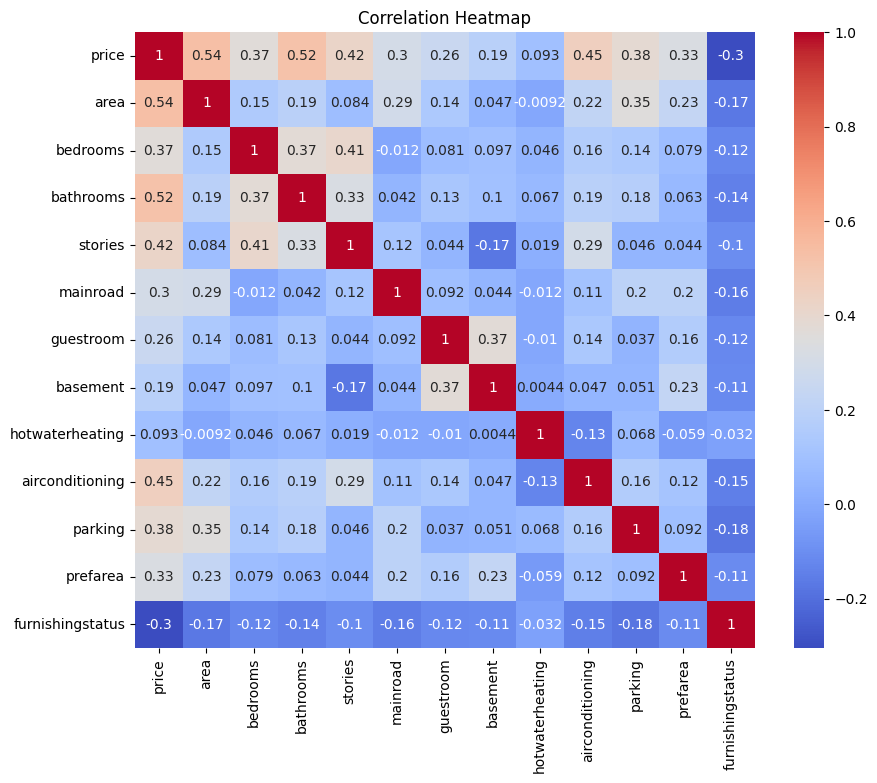

In [13]:
# checking correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

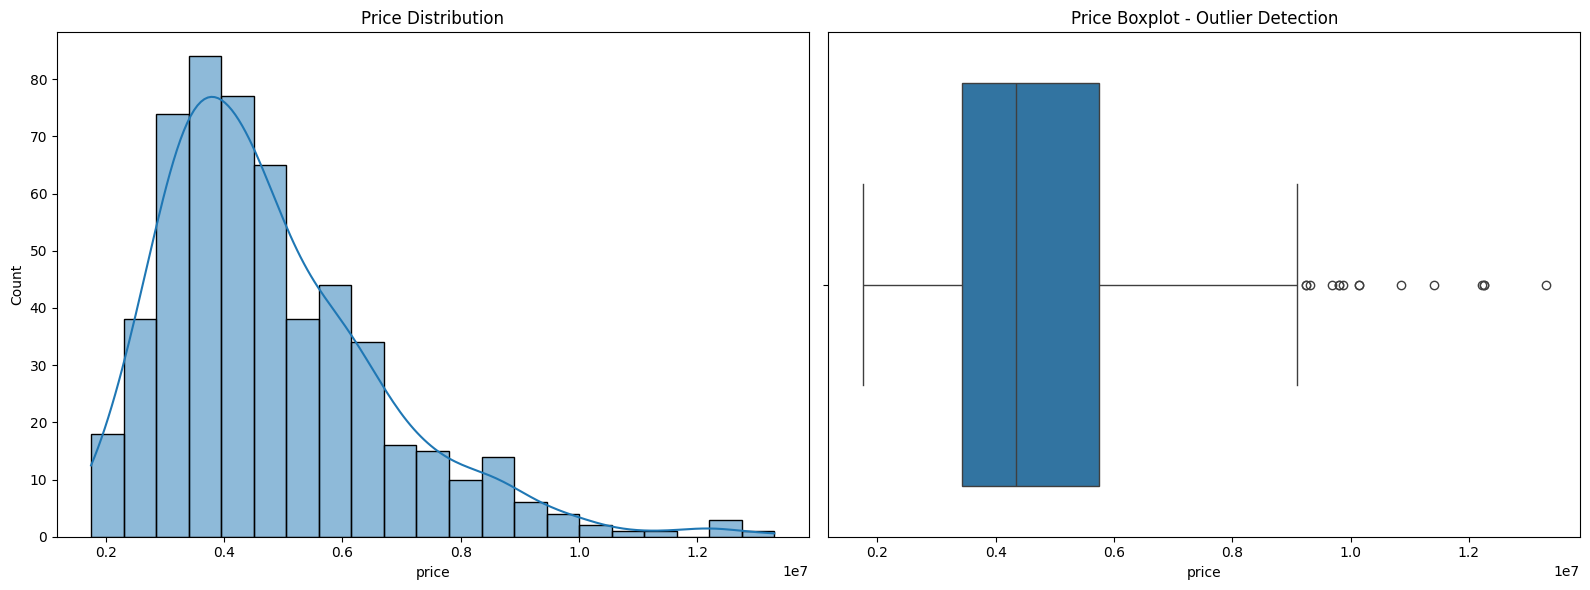

In [29]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the histogram with KDE on the first subplot
sns.histplot(housing_data['price'], kde=True, ax=axes[0])
axes[0].set_title('Price Distribution')

# Plotting the boxplot on the second subplot
sns.boxplot(x=housing_data['price'], ax=axes[1])
axes[1].set_title('Price Boxplot - Outlier Detection')

# Display the plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

### Modelling

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
#Defining Features and Target
X = housing_data.drop('price', axis=1)
y = housing_data['price']

In [16]:
#Splitting the dataset into training and test datasets
#80% training data and 20% testing data.
#random_state=42 ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Training the Linear Regression Model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
#Making Predictions
y_pred = model.predict(X_test)
y_pred

array([5203691.70963178, 7257004.02115475, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996131,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.70489929, 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920608,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767581, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491253, 5788125.92515322,
       4768370.18154076, 4391684.04193171, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.1194117 , 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296896,
       3798185.05328059,

In [21]:
#Evaluating the Model
#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse

1771751116594.0352

In [23]:
r2 = r2_score(y_test, y_pred)
r2

0.6494754192267803

In [24]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [34]:
# New house features (example)
new_house = {
    'area': 7420,
    'bedrooms': 4,
    'bathrooms': 2,
    'stories': 3,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 0,
    'hotwaterheating': 0,
    'airconditioning': 1,
    'parking': 2,
    'prefarea': 1,
    'furnishingstatus': 0
}

# Convert the dictionary to a DataFrame, ensuring the same column order as the training data
new_house_df = pd.DataFrame([new_house])

# Ensure the new house data has the same columns as the training data (features in X)
new_house_df = new_house_df[housing_data.drop('price', axis=1).columns]

# Predict the price for the new house
predicted_price = model.predict(new_house_df)

# Output the predicted price
print(f"The predicted price for the new house is: {predicted_price[0]}")

The predicted price for the new house is: 8004072.411540005


In [31]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')